<a href="https://colab.research.google.com/github/7201krap/PYTHON_applied_data_science/blob/main/apr17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from sklearn import datasets

# How are we going to use evaluate the performance? 
# 1. accuracy
from sklearn import metrics
# 2. f1 score 
from sklearn.metrics import f1_score

# Machine learning models 

# Linear Regression 
# url : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

# SVM
# url: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm

# KNN 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree
# url: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

# Random Forest 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Logistic Classifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

# PCA 
from sklearn.decomposition import PCA 

# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

Here, I use cancer dataset for tutorials.
It can be simply changed to another dataset

## Machine learning algorithms that we are going to use

- SVM

- Random Forest 

- Decision Tree 

- Softmax 

- KNN 

## Preprocess all data
https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

In [46]:
sampled_dep_score = pd.read_csv('sampled_dep_score.csv')

target = sampled_dep_score['dep_score'].copy()

data = sampled_dep_score.copy()
del data['dep_score']

In [47]:
data

,comp_week,comp_wend,text_week,text_wend,tv_week,tv_wend
0,2,1,1,1,2,1
1,2,2,1,1,2,2
2,1,1,1,1,2,3
3,3,3,2,2,1,1
4,1,1,1,1,2,2
...,...,...,...,...,...,...
1199,1,2,1,1,2,2
1200,0,2,1,2,2,3
1201,2,2,2,2,2,2
1202,2,2,2,2,2,2


In [67]:
target

0       0.0
1       3.0
2       4.0
3       2.0
4       2.0
       ... 
1199    1.0
1200    3.0
1201    0.0
1202    3.0
1203    1.0
Name: dep_score, Length: 1204, dtype: float64

## PCA section

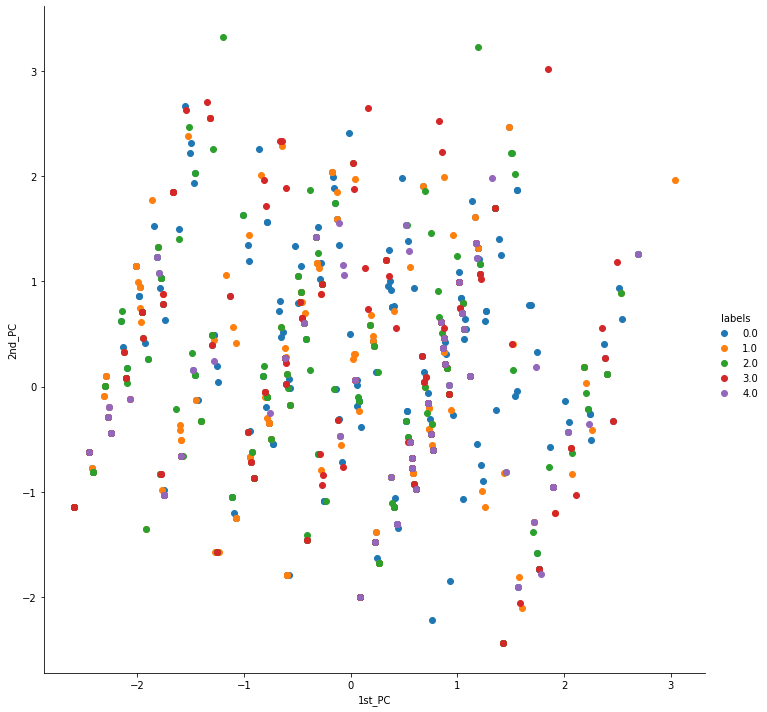

In [49]:
pca = PCA(n_components=2, random_state=1)
pca_data = pca.fit_transform(data)

data_with_labels = np.vstack((pca_data.T, target)).T
pca_df = pd.DataFrame(data=data_with_labels, columns=('1st_PC', '2nd_PC', 'labels'))
sns.FacetGrid(pca_df, hue='labels', height=10).map(plt.scatter, '1st_PC', '2nd_PC').add_legend()
plt.show()

In [50]:
pca_df

,1st_PC,2nd_PC,labels
0,1.034521,0.837540,0.0
1,0.720279,-0.155544,3.0
2,0.846385,0.617093,4.0
3,-0.565650,-0.170844,2.0
4,1.011437,0.990386,2.0
...,...,...,...
1199,0.862247,0.370596,1.0
1200,0.160962,0.737013,3.0
1201,-0.619690,0.274068,0.0
1202,-0.619690,0.274068,3.0


## Generate Train and Test - Linear Regression

In [51]:
from sklearn.model_selection import train_test_split

X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(pca_data, target, test_size=0.3, random_state=1)  # 70% training and 30% test

## Linear Regression

In [52]:
lin_reg = LinearRegression()
lin_reg.fit(X_pca_train, y_pca_train)

y_pca_pred = lin_reg.predict(X_pca_test)

mse = mean_squared_error(y_pca_test, y_pca_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_pca_test, y_pca_pred)


print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

RMSE value:  1.2193985244882242
R2 value:  -0.006475293394414772


## Generate Train and Test - Other Algorithms

In [53]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=1)  # 70% training and 30% test

## SVM

In [54]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 1)

In [55]:
print(len(np.logspace(-4, 0, 5)))
print(len(np.logspace(-3, 1, 5)))

5
5


In [56]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC(random_state=1)

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=2)      

In [57]:
# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}


In [58]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score macro:", f1_score(y_test, svm_y_pred, average='macro'))
print("F1 score weighted:", f1_score(y_test, svm_y_pred, average='weighted'))

Accuracy: 0.4143646408839779
F1 score macro: 0.12120632979130037
F1 score weighted: 0.2593503673034273


## Logistic Regression

In [59]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression(random_state=1)

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [60]:
# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
best hyper parameters {'C': 0.0001, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}


/home/jhpark/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.40743872        nan 0.40743872 0.40743872
 0.40743872 0.40743872 0.40743872 0.40743872        nan        nan
        nan        nan        nan 0.4026275  0.4026275         nan
 0.4026275  0.4026275         nan        nan 0.40743872        nan
 0.40743872 0.40743872 0.40743872 0.40743872 0.40743872 0.40743872
        nan        nan        nan        nan        nan 0.40263454
 0.40263454        nan 0.40263454 0.40263454        nan        nan
        nan        nan 0.40743872 0.40743872 0.40743872        nan
 0.40743872 0.40743872        nan        nan        nan        nan
        nan 0.4026275  0.4026275         nan 0.4026275  0.4026275
        nan        nan 0.40743872        nan 0.40743872 0.40743872
 0.40743872 0.40743872 0.40743872 0.40743872        nan        nan
        nan        nan        nan 0.4026275  0.40

In [61]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score macro:", f1_score(y_test, log_y_pred, average='macro'))
print("F1 score weighted:", f1_score(y_test, log_y_pred, average='weighted'))

Accuracy: 0.43370165745856354
F1 score macro: 0.12100192678227362
F1 score weighted: 0.2623936810057591


## KNN

In [68]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int)
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier(n_neighbors=len(target.unique()))

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [69]:
# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'algorithm': 'brute', 'leaf_size': 2, 'weights': 'uniform'}


In [70]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score macro:", f1_score(y_test, knn_y_pred, average='macro'))
print("F1 score weighted:", f1_score(y_test, knn_y_pred, average='weighted'))

Accuracy: 0.3674033149171271
F1 score macro: 0.18503451676528598
F1 score weighted: 0.3017895639681657


## Random Forest

In [71]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier(random_state=1)

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [72]:
# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits
best hyper parameters {'bootstrap': False, 'criterion': 'gini', 'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 38, 'min_samples_split': 2, 'n_estimators': 5}


In [73]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score macro:", f1_score(y_test, rf_y_pred, average='macro'))
print("F1 score weighted:", f1_score(y_test, rf_y_pred, average='weighted'))

Accuracy: 0.4116022099447514
F1 score: 0.41160220994475144
